<a href="https://colab.research.google.com/github/nandithanabiilahp/Statistika_Terapan./blob/main/Statiska_Terapan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Nama kelompok
#Nanditha Nabiilah Putri (G1A021001)
#Erin Handayani Azzahra (G1A021049)

In [ ]:
import csv

header = ['bulan','ipska','nilai_ekspor']
data = [
    ['01','DKI JKT','528537125'],
    ['02','DKI JKT','438833825'],
    ['03','DKI JKT','391246284'],
    ['04','DKI JKT','1064346116'],
    ['05','DKI JKT','357450522'],
    ['06','DKI JKT','437256186'],
    ['01','JAK-UT','223791762'],
    ['02','JAK-UT','198552519'],
    ['03','JAK-UT','151426616'],
    ['04','JAK-UT','184098837'],
    ['05','JAK-UT','178658153'],
    ['06','JAK-UT','193668163'],
    ['01','JAK-PUS','1171668529'],
    ['02','JAK-PUS','690039894'],
    ['03','JAK-PUS','373460440'],
    ['04','JAK-PUS','283465835'],
    ['05','JAK-PUS','217194883'],
    ['06','JAK-PUS','260908198'],
    ['01','JAK-BAR','841881488'],
    ['02','JAK-BAR','539965684'],
    ['03','JAK-BAR','601236734'],
    ['04','JAK-BAR','404042691'],
    ['05','JAK-BAR','638908076'],
    ['06','JAK-BAR','496183798'],
    ['01','JAK-SEL','473557639'],
    ['02','JAK-SEL','281864007'],
    ['03','JAK-SEL','301978236'],
    ['04','JAK-SEL','422840320'],
    ['05','JAK-SEL','491313665'],
    ['06','JAK-SEL','436981350'],
    ['01','JAK-TIM','301820481'],
    ['02','JAK-TIM','627499844'],
    ['03','JAK-TIM','617027310'],
    ['04','JAK-TIM','535895885'],
    ['05','JAK-TIM','868226764'],
    ['06','JAK-TIM','517035069'],

]

with open('DataEksporProvinsiDKIJakarta.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write multiple rows
    writer.writerows(data)

In [ ]:
import pandas as pan
import numpy as num
import statistics
dataset = pan.read_csv('DataEksporProvinsiDKIJakarta.csv')
dataset.head()

,bulan,ipska,nilai_ekspor
0,1,DKI JKT,528537125
1,2,DKI JKT,438833825
2,3,DKI JKT,391246284
3,4,DKI JKT,1064346116
4,5,DKI JKT,357450522


In [ ]:
dataset.shape

(36, 3)

In [ ]:
print(dataset.isnull().sum())

bulan           0
ipska           0
nilai_ekspor    0
dtype: int64


In [ ]:
dataset.dropna(inplace=True)
print(dataset.isnull().sum())

bulan           0
ipska           0
nilai_ekspor    0
dtype: int64


In [ ]:
dataset['nilai_ekspor'] = dataset['nilai_ekspor'].replace(dataset['nilai_ekspor'].mean())
print(dataset['nilai_ekspor'][:15])

0      528537125
1      438833825
2      391246284
3     1064346116
4      357450522
5      437256186
6      223791762
7      198552519
8      151426616
9      184098837
10     178658153
11     193668163
12    1171668529
13     690039894
14     373460440
Name: nilai_ekspor, dtype: int64


In [ ]:
dataset['nilai_ekspor'] = dataset['nilai_ekspor'].interpolate(method='linear',limit_direction='forward', axis=0)
dataset.isnull().sum()

bulan           0
ipska           0
nilai_ekspor    0
dtype: int64

In [ ]:
dataset['nilai_ekspor'][:15]

0      528537125
1      438833825
2      391246284
3     1064346116
4      357450522
5      437256186
6      223791762
7      198552519
8      151426616
9      184098837
10     178658153
11     193668163
12    1171668529
13     690039894
14     373460440
Name: nilai_ekspor, dtype: int64

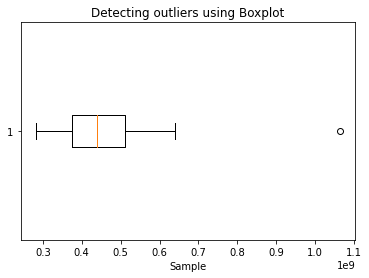

In [ ]:
import matplotlib.pyplot as plt

sample= [528537125,438833825,391246284,1064346116,357450522,638908076,496183798,473557639,281864007,301978236,422840320]
plt.boxplot(sample, vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')
plt.show()

In [ ]:
import numpy as np
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    median = np.median(data)
    std = np.std(data)
    # print(median, std)
    for i in data:
        z_score = (i-median)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(sample)
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [1064346116]


In [ ]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(sample)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [1064346116]


In [ ]:
# Trimming
for i in sample_outliers:
    a = sample
    a.remove(i)
print(a)
# print(len(sample), len(a))

[528537125, 438833825, 391246284, 357450522, 638908076, 496183798, 473557639, 281864007, 301978236, 422840320]


In [ ]:
median = np.median(sample)# Replace with median
for i in sample_outliers:
    c = np.where(sample==i, 14,sample)
print("Sample: ", sample)
print("New array: ",c)
# print(x.dtype)

Sample:  [528537125, 438833825, 391246284, 357450522, 638908076, 496183798, 473557639, 281864007, 301978236, 422840320]
New array:  [528537125 438833825 391246284 357450522 638908076 496183798 473557639
 281864007 301978236 422840320]


Text(0.5, 0, 'Sample')

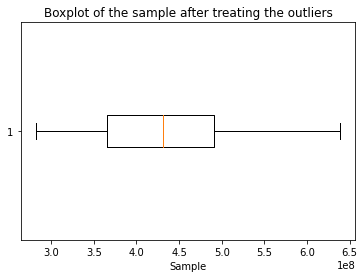

In [ ]:
plt.boxplot(c, vert=False)
plt.title("Boxplot of the sample after treating the outliers")
plt.xlabel("Sample")

In [ ]:
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(sample, 10)
ninetieth_percentile = np.percentile(sample, 90)
print(tenth_percentile, ninetieth_percentile)
b = np.where(sample<tenth_percentile, tenth_percentile, sample)
b = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
# print("Sample:", sample)
print("New array:",b)

299966813.1 539574220.0999999
New array: [5.28537125e+08 4.38833825e+08 3.91246284e+08 3.57450522e+08
 5.39574220e+08 4.96183798e+08 4.73557639e+08 2.99966813e+08
 3.01978236e+08 4.22840320e+08]
